# Predict used car price with regression

import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_car=pd.read_csv(r'C:\Users\DELL\Downloads\pred_car_price\train-data.csv')
df_car_test=pd.read_csv(r'C:\Users\DELL\Downloads\pred_car_price\test-data.csv')

In [3]:
df_car.head()    # shows top 5 rows

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df_car.columns  #column names

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [5]:
df_car_test.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

In [6]:
print(df_car.shape)

(6019, 14)


In [7]:
print(df_car_test.shape) # 6019 rows and 14 columns

(1234, 13)


# Data Cleaning: Handle NA values,Drop unnecessary columns,

In [8]:
df_car.describe() # calculating some statistical data like percentile, mean and std of the numerical values of the Series or 
                  #DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
#check null values 

In [10]:
df_car.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [11]:
#Drop New_price column .it has lot of missing value
#drop Unnamed: 0 

In [12]:
df_car.drop(['New_Price','Unnamed: 0'],axis=1,inplace= True)
df_car_test.drop(['New_Price','Unnamed: 0'],axis=1,inplace= True)

In [13]:
#check number of feature
print(df_car.shape)
print(df_car_test.shape)

(6019, 12)
(1234, 11)


In [14]:
df_car.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [15]:
df_car_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [16]:
#check the skewness of the missing value

In [17]:
#check the data type
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [18]:
#Fill remaining null values. 
#We will use "ffil" i.e forward fill. forward fill
#data_trimm.fillna(method='ffill', inplace=True)
df_car.fillna(method='ffill',inplace=True)

In [19]:
#data_trimmed.isnull().sum()
#check if we have any values
df_car.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [20]:
df_car.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [21]:
#change object data type to numeric data type

In [22]:
#df_slovakia['date'] = pd.to_numeric(df_slovakia['date'])
print(df_car['Name'].value_counts())

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Maruti Wagon R VXI Plus                 1
Skoda Octavia Elegance 1.9 TDI          1
Mahindra Scorpio VLX AT AIRBAG BSIV     1
Ford Figo 1.5D Titanium Plus MT         1
BMW 5 Series 2003-2012 523i             1
Name: Name, Length: 1876, dtype: int64


In [23]:
print(df_car_test['Name'].value_counts())

Maruti Alto LXi                                        9
Volkswagen Polo 1.2 MPI Highline                       8
Honda City 1.5 V MT                                    8
Maruti Swift Dzire VDI                                 8
Honda Brio S MT                                        7
                                                      ..
Hyundai Creta 1.6 SX Automatic Diesel                  1
Mercedes-Benz A Class A200 CDI Sport                   1
Land Rover Range Rover HSE                             1
Mercedes-Benz E-Class 2009-2013 E350 CDI Avantgarde    1
Skoda Octavia 2.0 TDI MT Style                         1
Name: Name, Length: 768, dtype: int64


In [24]:
#from above we noticed that df_car' name is different from  test data set lets print the difference

SyntaxError: invalid syntax (<ipython-input-24-e2cedecc75d6>, line 1)

In [25]:
print(set(df_car['Name'])-set(df_car_test['Name']))

{'Mercedes-Benz New C-Class C 220CDIBE Avantgarde Command', 'Honda City ZX CVT', 'Hyundai i10 Asta', 'Ford Aspire Titanium Diesel', 'Volkswagen Ameo 1.5 TDI Comfortline AT', 'Tata Tigor 1.2 Revotron XTA', 'Porsche Panamera Diesel 250hp', 'Maruti Celerio VXI Optional AMT', 'Hyundai Verna CRDi 1.4 E', 'Ford Fiesta Titanium 1.5 TDCi', 'Ford EcoSport 1.5 TDCi Trend Plus', 'Audi TT 40 TFSI', 'Honda Jazz 1.5 VX i DTEC', 'Hyundai Sonata 2.4 GDI', 'Skoda Fabia 1.6 MPI Elegance', 'Hyundai Verna CRDi', 'Volkswagen Beetle 2.0', 'Mahindra Bolero DI BSII', 'Tata Zest Revotron 1.2T XM', 'Honda Accord VTi-L MT', 'Skoda Laura Classic 1.8 TSI', 'Honda City i VTEC E', 'BMW 5 Series 2003-2012 530d', 'Renault Scala RxL AT', 'Maruti Ritz LXI', 'Maruti Ertiga VXI AT Petrol', 'Honda City i DTec E', 'Maruti Ciaz Alpha', 'Maruti Baleno RS 1.0 Petrol', 'Renault KWID RXT Optional', 'Mercedes-Benz New C-Class C 220 CDI BE Avantgare', 'Land Rover Freelander 2 HSE', 'Renault Duster RXZ AWD', 'Audi A6 2011-2015 35 T

In [ ]:
#df["a"] = pd.to_numeric(df["a"])

In [ ]:
# let us Create a Company column . will split the column Name and take the first part i[0]as Company 

In [26]:
df_car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
#let us make another column name =Company,we will separate Name from Name column

In [27]:
Company=[ i.split()[0]  for i in df_car['Name']]
df_car.insert(0,'Company',Company)

In [28]:
df_car.head()

,Company,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [43]:
Company=[ i.split()[0]  for i in df_car_test['Name']]
df_car_test.insert(0,'Company',Company)

ValueError: cannot insert Company, already exists

In [41]:
#df_car_test.drop(['Comapany'],axis=1,inplace= True)

In [44]:
df_car_test.head()

,Company,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [88]:
print(df_car.shape)
print(df_car_test.shape)

(6019, 24)
(6019, 22)


In [45]:
print(set(df_car['Company'])-set(df_car_test['Company']))

{'Smart', 'Lamborghini', 'Ambassador', 'Force'}


In [46]:
print(set(df_car_test['Company'])-set(df_car['Company']))

{'OpelCorsa', 'Hindustan'}


In [ ]:
#df_car=pd.concat(['df_car','Company'],axis=1)
#df_car.insert(0,"Company",Company)
#df_2015=pd.concat([df_2015,df_dummy_build], axis=1)

In [47]:
df_car.shape

(6019, 13)

In [49]:
df_car.dtypes

Company               object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [50]:
df_car_test.dtypes

Company               object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [51]:
print(df_car["Company"].value_counts())

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Ambassador          1
Lamborghini         1
Bentley             1
Smart               1
Name: Company, dtype: int64


# converting string data to numeric form

In [52]:
#train dat set
#Using errors='coerce'. It will replace all non-numeric values with NaN.
df_car['Mileage'] = pd.to_numeric(df_car['Mileage'].str.lower().str.split().str.get(0), errors='coerce')
df_car['Engine'] = pd.to_numeric(df_car['Engine'].str.lower().str.split().str.get(0), errors='coerce')
df_car['Power'] = pd.to_numeric(df_car['Power'].str.lower().str.split().str.get(0), errors='coerce')
#df['Engine'] = df['Engine'].str.split().str[0] Here we are seeing that Mileage,Engine and Power are object 
#type and specific units are also presented in the 
#dataset,that's why before fitting into model we have to perform some cleaning.
#df['Power'] = df['Power'].str.split().str[0]
#df['Name'] = df['Name'].str.split().str[0] Let's have the only Company name from the name column.

In [85]:
df_car['Mileage']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 6019, dtype: float64

In [53]:
df_car.dtypes

Company               object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
dtype: object

In [56]:
print(df_car_test.dtypes)

Company               object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object


In [57]:
#test data set
df_car_test['Mileage'] = pd.to_numeric(df_car_test['Mileage'].str.lower().str.split().str.get(0), errors='coerce')
df_car_test['Engine'] = pd.to_numeric(df_car_test['Engine'].str.lower().str.split().str.get(0), errors='coerce')
df_car_test['Power'] = pd.to_numeric(df_car_test['Power'].str.lower().str.split().str.get(0), errors='coerce')

AttributeError: Can only use .str accessor with string values!

In [58]:
print(df_car_test.dtypes)

Company               object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object


In [59]:
#conerting Fuel_Type to numeric
df_car['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
# Convert categorical variable  tests_units into dummy(one hot encoding)
#test_performed=pd.get_dummies(df_slovakia['tests_units'])

In [60]:
Fuel_Type_num=pd.get_dummies(df_car['Fuel_Type'])

In [61]:
Fuel_Type_num

,CNG,Diesel,Electric,LPG,Petrol
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
6014,0,1,0,0,0
6015,0,1,0,0,0
6016,0,1,0,0,0
6017,0,0,0,0,1


In [62]:
## add "test_performed" to df_slovakia data frame
#df_slovakia = pd.concat([df_slovakia,test_performed], axis=1)
df_car=pd.concat([df_car,Fuel_Type_num],axis=1)

In [63]:
#convert test data fuel type to numeric
df_car_test['Fuel_Type'].value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

In [64]:
Fuel_Type_num=pd.get_dummies(df_car_test['Fuel_Type'])

In [65]:
df_car_test=pd.concat([df_car_test,Fuel_Type_num],axis=1)

In [66]:
#transmission
df_car['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [67]:
Transmission_num=pd.get_dummies(df_car['Transmission'])

In [68]:
df_car=pd.concat([df_car,Transmission_num],axis=1)

In [69]:
Transmission_num

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
6014,0,1
6015,0,1
6016,0,1
6017,0,1


In [70]:
df_car_test['Owner_Type'].value_counts()

First             1023
Second             184
Third               24
Fourth & Above       3
Name: Owner_Type, dtype: int64

In [71]:
Owner_Type_num=pd.get_dummies(df_car['Owner_Type'])

In [72]:
Owner_Type_num

,First,Fourth & Above,Second,Third
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6014,1,0,0,0
6015,1,0,0,0
6016,0,0,1,0
6017,1,0,0,0


In [73]:
df_car_test=pd.concat([df_car_test,Owner_Type_num],axis=1)
df_car_test=pd.concat([df_car_test,Transmission_num],axis=1)

In [ ]:
df_car_test.dtype

In [74]:
#Owner_Type_num
df_car=pd.concat([df_car,Owner_Type_num],axis=1)

In [75]:
df_car.dtypes

Company               object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
CNG                    uint8
Diesel                 uint8
Electric               uint8
LPG                    uint8
Petrol                 uint8
Automatic              uint8
Manual                 uint8
First                  uint8
Fourth & Above         uint8
Second                 uint8
Third                  uint8
dtype: object

In [76]:
Owner_Type_num

,First,Fourth & Above,Second,Third
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6014,1,0,0,0
6015,1,0,0,0
6016,0,0,1,0
6017,1,0,0,0


In [ ]:
print(df_car_test['Transmission'].value_counts())
print(df_car_test['Fuel_Type'].value_counts())
print(df_car_test['Owner_Type'].value_counts())

In [77]:
Transmission_num=pd.get_dummies(df_car_test['Transmission'])

In [78]:
Owner_Type_num=pd.get_dummies(df_car_test['Owner_Type'])

In [79]:
Owner_Type_num

,First,Fourth & Above,Second,Third
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
6014,0,0,0,0
6015,0,0,0,0
6016,0,0,0,0
6017,0,0,0,0


In [80]:
Transmission_num

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
6014,0,0
6015,0,0
6016,0,0
6017,0,0


In [83]:
print(df_car.dtypes)
#print(df_car_test.dtypes)

Company               object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
CNG                    uint8
Diesel                 uint8
Electric               uint8
LPG                    uint8
Petrol                 uint8
Automatic              uint8
Manual                 uint8
First                  uint8
Fourth & Above         uint8
Second                 uint8
Third                  uint8
dtype: object


In [84]:
print(df_car_test.dtypes)

Company               object
Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
CNG                  float64
Diesel               float64
LPG                  float64
Petrol               float64
First                  uint8
Fourth & Above         uint8
Second                 uint8
Third                  uint8
Automatic              uint8
Manual                 uint8
dtype: object


In [82]:
print(df_car.shape)#electric is extra
print(df_car_test.shape)#

(6019, 24)
(6019, 22)


In [86]:
df_car.isnull().sum()

Company                0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                108
Seats                  0
Price                  0
CNG                    0
Diesel                 0
Electric               0
LPG                    0
Petrol                 0
Automatic              0
Manual                 0
First                  0
Fourth & Above         0
Second                 0
Third                  0
dtype: int64

In [90]:
df_car.dtypes

Company               object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
CNG                    uint8
Diesel                 uint8
Electric               uint8
LPG                    uint8
Petrol                 uint8
Automatic              uint8
Manual                 uint8
First                  uint8
Fourth & Above         uint8
Second                 uint8
Third                  uint8
dtype: object

In [94]:
#df =df[df.Power != 'null']Here we are seeing that 103 rows in Power column are containing null values.
#As we have almost 7000 datapoints, let's remove those.
df_car=df_car[df_car.Power !='null']

In [101]:
df_car.Power.isnull().sum()

108

In [100]:
#Let's clear 'null' values from our dataset if any present
df_car[pd.to_numeric(df_car.Power, errors = 'coerce').isnull()]

,Company,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
76,Ford,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399,...,1,0,0,0,0,1,1,0,0,0
79,Hyundai,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086,...,0,0,0,1,0,1,1,0,0,0
89,Hyundai,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086,...,0,0,0,1,0,1,1,0,0,0
120,Hyundai,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086,...,0,0,0,1,0,1,0,0,1,0
143,Hyundai,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086,...,0,0,0,1,0,1,0,0,1,0
5893,Maruti,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061,...,0,0,0,1,0,1,0,0,1,0
5925,Skoda,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798,...,0,0,0,1,0,1,1,0,0,0
5943,Mahindra,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112,...,1,0,0,0,0,1,1,0,0,0


In [106]:
df_car=df_car[df_car.Power !='null']

In [108]:
df_car=df_car.dropna()
print(df_car.isnull().sum())

Company              0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
CNG                  0
Diesel               0
Electric             0
LPG                  0
Petrol               0
Automatic            0
Manual               0
First                0
Fourth & Above       0
Second               0
Third                0
dtype: int64


In [107]:
df_car.isnull().sum()

Company                0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                108
Seats                  0
Price                  0
CNG                    0
Diesel                 0
Electric               0
LPG                    0
Petrol                 0
Automatic              0
Manual                 0
First                  0
Fourth & Above         0
Second                 0
Third                  0
dtype: int64

In [105]:
df_car_test.isnull().sum()

Company              4785
Name                 4785
Location             4785
Year                 4785
Kilometers_Driven    4785
Fuel_Type            4785
Transmission         4785
Owner_Type           4785
Mileage              4785
Engine               4795
Power                4817
Seats                4796
CNG                  4785
Diesel               4785
LPG                  4785
Petrol               4785
First                   0
Fourth & Above          0
Second                  0
Third                   0
Automatic               0
Manual                  0
dtype: int64

# EXPLORATORY DATA ANALYSIS# 

After preprocessing the data, it is analyzed through visual exploration to gather insights about the model that can
be applied to the data, understand the diversity in the data and the range of every field. We use a bar chart, box plot,
distribution graph, etc. to explore each feature varies
and its relation with other features including the target feature.

# Data Analysis with Visualisation¶

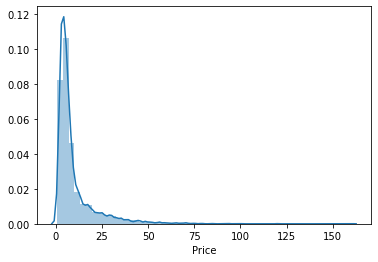

In [109]:
#First have the Price distribution
sns.distplot(df_car['Price'])

In [111]:
df_car.head()

,Company,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,Maruti,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,...,0,0,0,0,0,1,1,0,0,0
1,Hyundai,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,...,1,0,0,0,0,1,1,0,0,0
2,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,...,0,0,0,1,0,1,1,0,0,0
3,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,...,1,0,0,0,0,1,1,0,0,0
4,Audi,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,...,1,0,0,0,1,0,0,0,1,0


In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [121]:
df_car['Name'] = le.fit_transform(df_car['Name'])
df_car['Location'] = le.fit_transform(df_car['Location'])
df_car['Company']=le.fit_transform(df_car['Company'])
df_car['Fuel_Type']=le.fit_transform(df_car['Fuel_Type'])
df_car['Transmission']=le.fit_transform(df_car['Transmission'])
df_car['Owner_Type']=le.fit_transform(df_car['Owner_Type'])

In [123]:
df_car.head()

,Company,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,18,1165,9,2010,72000,0,1,0,26.60,998,...,0,0,0,0,0,1,1,0,0,0
1,10,503,10,2015,41000,1,1,0,19.67,1582,...,1,0,0,0,0,1,1,0,0,0
2,9,477,2,2011,46000,4,1,0,18.20,1199,...,0,0,0,1,0,1,1,0,0,0
3,18,1028,2,2012,87000,1,1,0,20.77,1248,...,1,0,0,0,0,1,1,0,0,0
4,1,22,3,2013,40670,1,0,2,15.20,1968,...,1,0,0,0,1,0,0,0,1,0


In [115]:
df_car.columns

Index(['Company', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'CNG', 'Diesel', 'Electric', 'LPG', 'Petrol', 'Automatic',
       'Manual', 'First', 'Fourth & Above', 'Second', 'Third'],
      dtype='object')

In [124]:
#Bivariate Analysis with our target variable - Active Cases

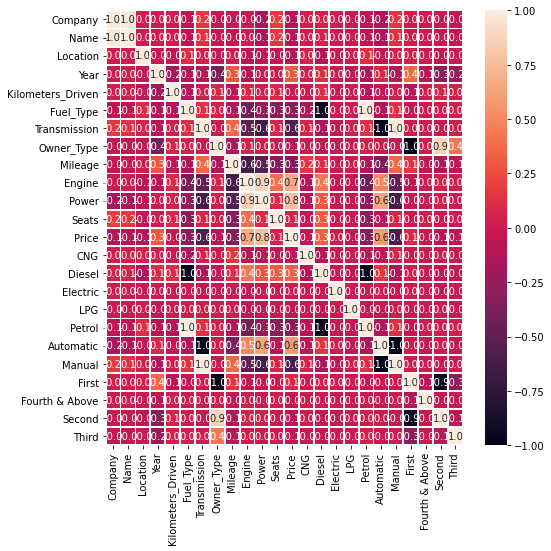

In [125]:

#correlation map
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_car.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [131]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [132]:
#feat_analysis=data_trimmed.drop(['Name', 'Company', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis = 1)
#Getting numerical dat()
y=df_car.Price

In [133]:
X=df_car
y=df_car.Price

In [134]:
model.fit(X, y)

LinearRegression()

In [135]:
model.score(X,y)

1.0

In [136]:
from sklearn.preprocessing import MinMaxScaler
X[['Kilometers_Driven', 'Mileage']] = MinMaxScaler().fit_transform(X[['Kilometers_Driven', 'Mileage']])

In [137]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [138]:
model.fit(X, y)

LinearRegression()

In [139]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [140]:
model.score(X,y)


1.0

In [142]:
y_pred_3=model.predict(X)

In [ ]:
##Neural Network  model

In [143]:
from keras import backend as K

ModuleNotFoundError: No module named 'keras'

In [149]:
#dfle.Year=2020-dfle["Year"]# converting year to age to get a better feature
train_dataset = df_car.sample(frac=0.8,random_state=0)
test_dataset = df_car_test.drop(train_dataset.index)
train_labels=df_car.Price
test_labels=df_car_test.Price

train_dataset=train_dataset.drop("Price",axis=1)

AttributeError: 'DataFrame' object has no attribute 'Price'

In [ ]:
import tensorflow as tf
from tensorflow import keras
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [130]:
df_car.dtypes

Company                int64
Name                   int64
Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
CNG                    uint8
Diesel                 uint8
Electric               uint8
LPG                    uint8
Petrol                 uint8
Automatic              uint8
Manual                 uint8
First                  uint8
Fourth & Above         uint8
Second                 uint8
Third                  uint8
dtype: object

In [128]:
df_car_test.head()
print(df_car_test.shape)

(6019, 22)


In [118]:
df_car.dtypes

Company               object
Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
CNG                    uint8
Diesel                 uint8
Electric               uint8
LPG                    uint8
Petrol                 uint8
Automatic              uint8
Manual                 uint8
First                  uint8
Fourth & Above         uint8
Second                 uint8
Third                  uint8
dtype: object

Q.) Which company sells most Number of cars?

In [ ]:
df_car['Name'].value_counts()

In [ ]:
df_car['Company']
plt.figure(figsize=(20,12))
plt.xlabel('Company Name')
plt.ylabel('No. of cars sold')
plt.title('Cars sold per company')
df_car ['Company'].value_counts().plot(kind='bar')
plt.show()

# Q.) Which fuel Type has lesser mileage?

In [ ]:
#convert fuel type To int 

In [ ]:
mileage = df_car.groupby('Fuel_Type')

In [ ]:
df_car

In [ ]:
mileage

In [ ]:
#x=df_car.groupby('Fuel_Type')
#y=df_car["Mileage"]
x=np.array(df_car.groupby('Fuel_Type'))
y=np.array(df_car["Mileage"])
plt.bar(x,y)
plt.show()

In [ ]:
mileage = df_car.groupby('Fuel_Type').Mileage.mean()
plt.xlabel("Fuel Type")
plt.xlabel("Mileage")
plt.title("Fuel Type vs Mileage")
mileage.plot(kind='bar')
plt.show()

# Q.) What is the number of cars originally purchased per year?

In [ ]:
purchased_car_per_year = df_car['Year'].value_counts()
purchased_car_per_year.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Paurchased Cars")
plt.title("Year vs Purchased cars")
plt.show()

In [ ]:
average_price = df_car.groupby('Company').Price.mean()
average_price.plot(kind='bar')
plt.show()

# Q.) What is the average price per company?¶

In [ ]:
average_price = df_car.groupby('Company').Price.mean()
average_price.plot(kind='bar')
plt.show()

# Q.) After driving for how much KMs people like to sell their cars?

In [ ]:
Company_Kilometers_Driven = df_car.groupby('Company').Kilometers_Driven.mean()
Company_Kilometers_Driven.plot(kind='bar')
plt.xlabel("s")
plt.ylabel("s")
plt.title("Average Kilometeres vs Company")
plt.show()